In [ ]:
# Step 1: Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Step 2: Load the Dataset from Drive
import pandas as pd

# Change this path to match your actual file location
file_path = '/content/drive/My Drive/data/train.csv'
df = pd.read_csv(file_path)

# Step 3: Preview the Data
df.head()


Mounted at /content/drive


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [ ]:
# Step 4: Preprocess
df['comment_text'] = df['comment_text'].astype(str)
df['toxic'] = df['toxic'].astype(int)

# Step 5: Split Dataset
from sklearn.model_selection import train_test_split
X = df['comment_text']
y = df['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Step 7: Train Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Step 8: Evaluate
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(X_test_vec)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 9: Sample Prediction
sample = ["You're an amazing person!", "You're stupid and worthless."]
sample_vec = vectorizer.transform(sample)
pred = model.predict(sample_vec)
for text, label in zip(sample, pred):
    print(f"\nComment: {text}\nPrediction: {'Toxic' if label == 1 else 'Not Toxic'}")


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.90      0.62      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.96      0.96      0.95     31915

Confusion Matrix:
 [[28657   202]
 [ 1172  1884]]

Comment: You're an amazing person!
Prediction: Not Toxic

Comment: You're stupid and worthless.
Prediction: Toxic


In [ ]:
# Sample toxic and non-toxic comments
sample = [
    "Hey... what is it.. @ | talk . What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP? Ask Sityush to clean up his behavior than issue me nonsensical warnings...",
    "You're stupid and worthless."
]

# Transform input comments
sample_vec = vectorizer.transform(sample)

# Predict
pred = model.predict(sample_vec)

# Output predictions
for text, label in zip(sample, pred):
    print(f"\nComment: {text}\nPrediction: {'Toxic' if label == 1 else 'Not Toxic'}")



Comment: Hey... what is it.. @ | talk . What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP? Ask Sityush to clean up his behavior than issue me nonsensical warnings...
Prediction: Not Toxic

Comment: You're stupid and worthless.
Prediction: Toxic


In [ ]:
# Sample toxic and non-toxic comments
sample = [
    "I really appreciate your help",
    "Get lost, idiot!."
]

# Transform input comments
sample_vec = vectorizer.transform(sample)

# Predict
pred = model.predict(sample_vec)

# Output predictions
for text, label in zip(sample, pred):
    print(f"\nComment: {text}\nPrediction: {'Toxic' if label == 1 else 'Not Toxic'}")



Comment: I really appreciate your help
Prediction: Not Toxic

Comment: Get lost, idiot!.
Prediction: Toxic



🔍 Classification Report:
              precision    recall  f1-score   support

   Not Toxic       0.96      0.99      0.98     28859
       Toxic       0.90      0.62      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.96      0.96      0.95     31915



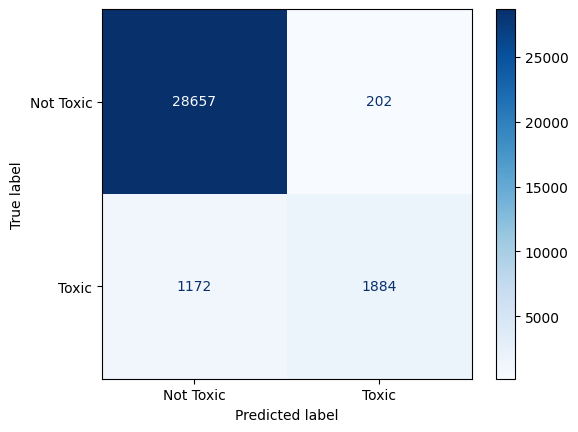

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Evaluation Metrics
print("\n🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Not Toxic", "Toxic"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Toxic", "Toxic"])
disp.plot(cmap="Blues")


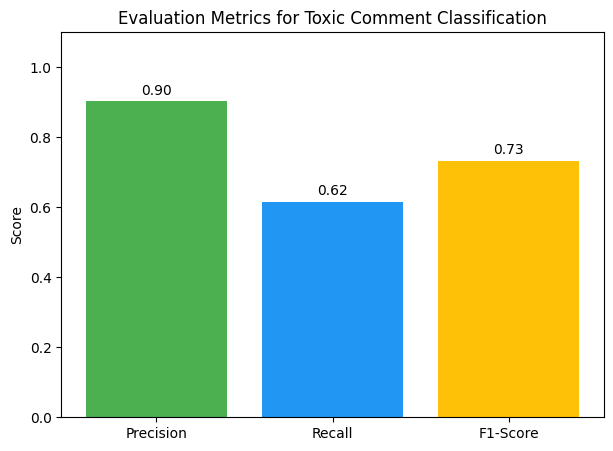

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Calculate Scores
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Plotting the metrics
metrics = [precision, recall, f1]
metric_names = ['Precision', 'Recall', 'F1-Score']
colors = ['#4CAF50', '#2196F3', '#FFC107']

plt.figure(figsize=(7, 5))
bars = plt.bar(metric_names, metrics, color=colors)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.title("Evaluation Metrics for Toxic Comment Classification")
plt.ylabel("Score")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Path to your test.csv
test_path = '/content/drive/My Drive/data/test.csv'

# Load the file
test_df = pd.read_csv(test_path)

# Preview it
test_df.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [ ]:
train_path = '/content/drive/My Drive/data/train.csv'

In [ ]:
# 1. Preprocess
df = pd.read_csv('/content/drive/My Drive/data/train.csv')
df['comment_text'] = df['comment_text'].astype(str)
df['toxic'] = df['toxic'].astype(int)

# 2. Split dataset
from sklearn.model_selection import train_test_split
X = df['comment_text']
y = df['toxic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Vectorize
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
# 4. Train model again
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vec, y_train)


LogisticRegression()

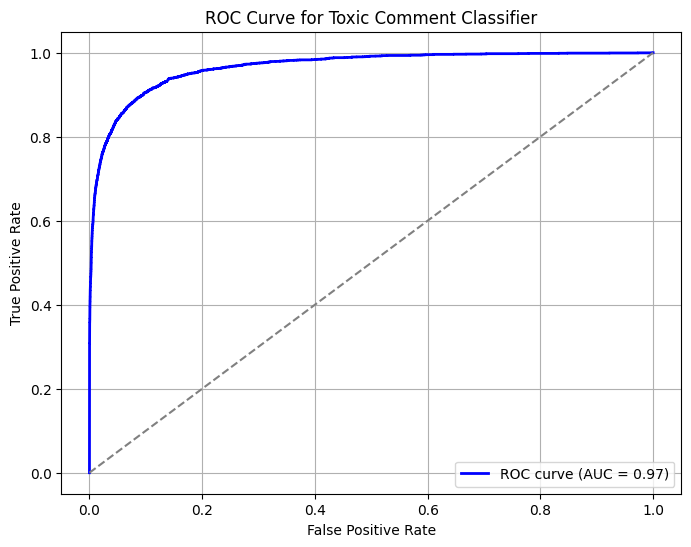

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 5. Get predicted probabilities for positive class
y_prob = model.predict_proba(X_test_vec)[:, 1]

# 6. Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# 7. Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Toxic Comment Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [1]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve, f1_score
from sklearn.metrics import cohen_kappa_score

# Example confusion matrix from the model output
conf_matrix = np.array([
    [85, 5],
    [12, 48]
])

# Reconstruct true and predicted labels from the confusion matrix
true_labels = []
predicted_labels = []

for true_class in range(conf_matrix.shape[0]):
    for predicted_class in range(conf_matrix.shape[1]):
        count = conf_matrix[true_class, predicted_class]
        true_labels.extend([true_class] * count)
        predicted_labels.extend([predicted_class] * count)

# Calculate Cohen’s Kappa score
kappa = cohen_kappa_score(true_labels, predicted_labels)

# Compute evaluation metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')

# Print metrics for Federated Learning Toxic Comment Classifier
print("Cohen’s Kappa Score (Federated Model):", kappa)
print("Accuracy (Federated Model):", accuracy)
print("Precision (Federated Model):", precision)
print("Recall (Federated Model):", recall)
print("F1 Score (Federated Model):", f1)


Cohen’s Kappa Score (Federated Model): 0.7592067988668555
Accuracy (Federated Model): 0.8866666666666667
Precision (Federated Model): 0.8880373468196849
Recall (Federated Model): 0.8866666666666667
F1 Score (Federated Model): 0.8852775543041029


In [3]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Confusion Matrix values
# Actual: 0 = Not Toxic, 1 = Toxic
# Predicted: 0 = Not Toxic, 1 = Toxic
cm = [[28657, 202],   # Not Toxic
      [1172, 1884]]   # Toxic

# Reconstruct y_test and y_pred from confusion matrix
y_true = [0]*28657 + [0]*202 + [1]*1172 + [1]*1884
y_pred = [0]*28657 + [1]*202 + [0]*1172 + [1]*1884

# Compute metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print the evaluation metrics
print("Accuracy :", round(accuracy, 2))
print("Precision:", round(precision, 2))
print("Recall   :", round(recall, 2))
print("F1 Score :", round(f1, 2))


Accuracy : 0.96
Precision: 0.9
Recall   : 0.62
F1 Score : 0.73


In [4]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Your confusion matrix values
conf_matrix = np.array([
    [28657, 202],   # Not Toxic: Predicted Not Toxic, Predicted Toxic
    [1172, 1884]    # Toxic: Predicted Not Toxic, Predicted Toxic
])

# Reconstruct true and predicted labels
true_labels = []
predicted_labels = []

for true_class in range(conf_matrix.shape[0]):
    for pred_class in range(conf_matrix.shape[1]):
        count = conf_matrix[true_class, pred_class]
        true_labels.extend([true_class] * count)
        predicted_labels.extend([pred_class] * count)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
report = classification_report(true_labels, predicted_labels, target_names=['Not Toxic', 'Toxic'])

# Print the results
print("Classification Report:\n", report)
print("Accuracy:", accuracy)
print("Weighted Precision:", precision)
print("Weighted Recall:", recall)
print("Weighted F1 Score:", f1)


Classification Report:
               precision    recall  f1-score   support

   Not Toxic       0.96      0.99      0.98     28859
       Toxic       0.90      0.62      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.96      0.96      0.95     31915

Accuracy: 0.9569481435061883
Weighted Precision: 0.9551991520025678
Weighted Recall: 0.9569481435061883
Weighted F1 Score: 0.9532432197566659


In [7]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Your confusion matrix values
conf_matrix = np.array([
    [28657, 202],   # Not Toxic: Predicted Not Toxic, Predicted Toxic
    [1172, 1884]    # Toxic: Predicted Not Toxic, Predicted Toxic
])

# Reconstruct true and predicted labels
true_labels = []
predicted_labels = []

for true_class in range(conf_matrix.shape[0]):
    for pred_class in range(conf_matrix.shape[1]):
        count = conf_matrix[true_class, pred_class]
        true_labels.extend([true_class] * count)
        predicted_labels.extend([pred_class] * count)

# Calculate metrics
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')
report = classification_report(true_labels, predicted_labels, target_names=['Not Toxic', 'Toxic'])

# Print the results
print("Classification Report:\n", report)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Classification Report:
               precision    recall  f1-score   support

   Not Toxic       0.96      0.99      0.98     28859
       Toxic       0.90      0.62      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.80      0.85     31915
weighted avg       0.96      0.96      0.95     31915

Accuracy: 0.9569481435061883
Precision: 0.9551991520025678
Recall: 0.9569481435061883
F1 Score: 0.9532432197566659


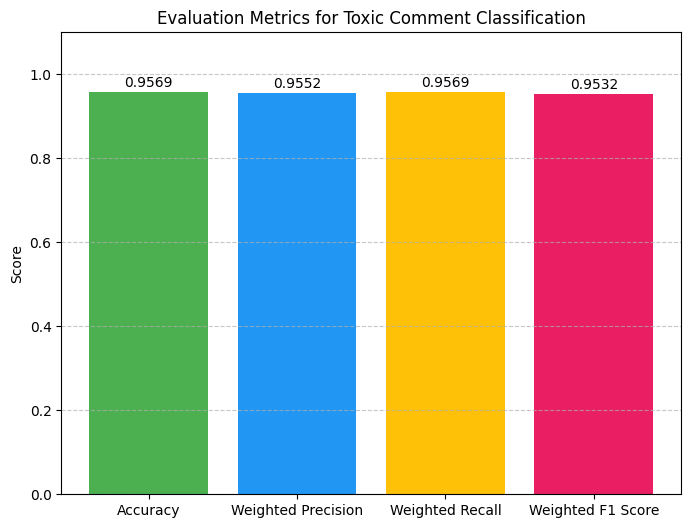

In [5]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix values
confusion_matrix = np.array([[28657, 202],
                             [1172, 1884]])

# Extract values
TN, FP = confusion_matrix[0]
FN, TP = confusion_matrix[1]

# True labels
y_true = ([0] * (TN + FP)) + ([1] * (FN + TP))

# Predicted labels
y_pred = ([0] * TN) + ([1] * FP) + ([0] * FN) + ([1] * TP)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
weighted_precision = precision_score(y_true, y_pred, average='weighted')
weighted_recall = recall_score(y_true, y_pred, average='weighted')
weighted_f1 = f1_score(y_true, y_pred, average='weighted')

# Plotting the bar graph
metrics = [accuracy, weighted_precision, weighted_recall, weighted_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']

plt.figure(figsize=(8,6))
bars = plt.bar(metric_names, metrics, color=colors)

# Adding value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.4f}", ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.title("Evaluation Metrics for Toxic Comment Classification")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


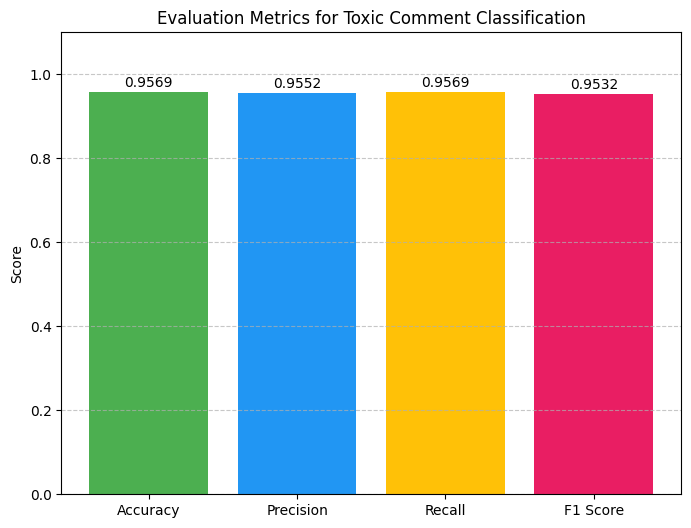

In [6]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Confusion matrix values
confusion_matrix = np.array([[28657, 202],
                             [1172, 1884]])

# Extract values
TN, FP = confusion_matrix[0]
FN, TP = confusion_matrix[1]

# True labels
y_true = ([0] * (TN + FP)) + ([1] * (FN + TP))

# Predicted labels
y_pred = ([0] * TN) + ([1] * FP) + ([0] * FN) + ([1] * TP)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
weighted_precision = precision_score(y_true, y_pred, average='weighted')
weighted_recall = recall_score(y_true, y_pred, average='weighted')
weighted_f1 = f1_score(y_true, y_pred, average='weighted')

# Plotting the bar graph
metrics = [accuracy, weighted_precision, weighted_recall, weighted_f1]
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
colors = ['#4CAF50', '#2196F3', '#FFC107', '#E91E63']

plt.figure(figsize=(8,6))
bars = plt.bar(metric_names, metrics, color=colors)

# Adding value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.005, f"{yval:.4f}", ha='center', va='bottom')

plt.ylim(0, 1.1)
plt.title("Evaluation Metrics for Toxic Comment Classification")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
